In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img = cv2.imread('gg.jpeg')
channels = cv2.split(img)
stretch_factors = []
for channel in channels:
    min_val, max_val, _, _ = cv2.minMaxLoc(channel)
    stretch_min = 0
    stretch_max = 255
    stretch_factor_1 = (stretch_max - stretch_min) / (max_val - min_val)
    stretch_factor_2 = stretch_min - stretch_factor_1 * min_val
    stretch_factors.append((stretch_factor_1, stretch_factor_2))
stretched_image = np.zeros_like(img) 
for i, channel in enumerate(channels):
    stretched_channel = cv2.convertScaleAbs(channel, alpha=stretch_factors[i][0], beta=stretch_factors[i][1]) 
    stretched_image[:, :, i] = stretched_channel

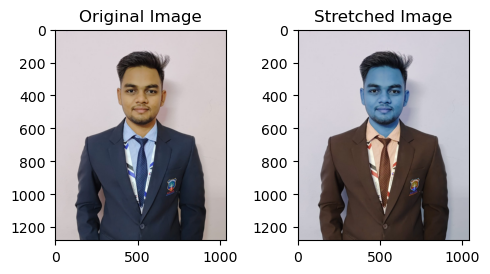

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axs[0].imshow(img1)
axs[0].set_title('Original Image')
axs[1].imshow(stretched_image)
axs[1].set_title('Stretched Image')
# axs[1][0].axis('off')
# axs[1][1].axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lower_level = 100
upper_level = 250 
mask = cv2.inRange(gray, lower_level, upper_level)  
intensity_sliced = cv2.bitwise_and(img, img, mask=mask)

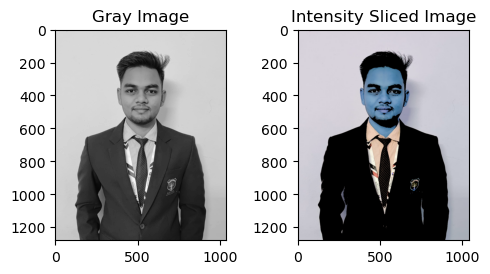

In [8]:
# Difference between the original image and the intensity sliced image:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Gray Image')
axs[1].imshow(intensity_sliced)
axs[1].set_title('Intensity Sliced Image')
plt.tight_layout()
plt.show()